# Project

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd
import plotly.io as pio
%matplotlib inline

In [2]:
from utils import *
from handle_dataset import *
from density import * 
from zscore import *
from plots import * 
from kmeans import *

In [3]:
pio.renderers.default = "notebook_connected"

In [4]:
DATA_PATH = 'data'

In [5]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK_TO_STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

}

In [6]:
labels = [
    'STAND',
    'SIT',
    'SIT&TALK',
    'WALK',
    'WALK&TALK',
    'CLIMB_STAIRS',
    'CLIMB_STAIRS&TALK',
    'STAND_TO_SIT',
    'SIT_TO_STAND',
    'STAND_TO_SIT&TALK',
    'SIT&TALK_TO_STAND',
    'STAND_TO_WALK', 
    'WALK_TO_STAND', 
    'STAND_TO_CLIMB_STAIRS',
    'CLIMB_STAIRS_TO_WALK',
    'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

]

## Exercise 2 - Import dataset

In [7]:
# data_user_0 = get_user_data(path=DATA_PATH, user_id=0)

In [8]:
# data_user_0.shape

In [9]:
dataset = get_all_data(DATA_PATH)

In [10]:
# dataset.shape

In [11]:
# type(dataset)

## Explore data

In [12]:
dataset.describe()

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity
count,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06
mean,3.429246e+00,7.717793e-01,8.451621e+00,1.520613e+00,-1.691060e-01,1.890623e+00,3.556803e-01,-1.450031e-02,6.034252e-01,4.014632e-01,5.555476e+05,4.032846e+00
std,1.188858e+00,2.494840e+00,3.743438e+00,3.747458e+00,3.592437e+01,5.289265e+01,4.621969e+01,4.767157e-01,4.752627e-01,6.953205e-01,3.720966e+05,2.582780e+00
min,1.000000e+00,-2.489000e+01,-2.324600e+01,-2.502500e+01,-5.088600e+02,-5.071500e+02,-4.077900e+02,-2.002100e+00,-1.438800e+00,-1.658700e+00,2.612300e+01,1.000000e+00
25%,2.000000e+00,-5.244600e-01,8.352300e+00,-1.328500e+00,-2.967200e+00,-2.829200e+00,-1.415125e+00,-4.087100e-01,5.211000e-01,-1.977500e-01,2.720200e+05,2.000000e+00
50%,3.000000e+00,3.722300e-01,9.388200e+00,1.323900e+00,1.709100e-01,-1.321600e-01,-1.696150e-02,3.941900e-02,7.182500e-01,4.391300e-01,5.370900e+05,4.000000e+00
75%,4.000000e+00,2.006400e+00,9.801800e+00,3.299600e+00,5.930100e+00,8.948325e+00,5.541700e+00,3.250500e-01,8.825900e-01,9.627200e-01,8.008600e+05,5.000000e+00
max,5.000000e+00,2.538100e+01,2.598500e+01,2.529000e+01,5.061000e+02,5.035700e+02,4.741600e+02,1.606100e+00,2.988100e+00,3.085500e+00,2.825500e+06,1.600000e+01


In [13]:
# dataset.info()

In [14]:
# dataset.columns

## Append metrics

In [15]:
data_with_features = append_metrics(dataset)

In [16]:
data_with_features

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity,accelerometer_module,gyroscope_module,magnetometer_module
0,1,-1.8650,9.3890,2.58120,-1.141800,-1.18560,0.84998,-0.34476,0.59839,1.01340,505.89,1,9.914340,1.852517,1.226340
1,1,-1.7963,9.3742,2.44600,-1.561800,-0.66165,0.59730,-0.34274,0.57631,1.00000,525.42,1,9.853184,1.798268,1.203995
2,1,-1.8696,9.3000,2.35140,-1.187700,-1.28410,0.14212,-0.34476,0.59639,1.01560,544.95,1,9.773151,1.754919,1.227185
3,1,-1.7961,9.3624,2.45840,-0.583990,-2.03340,0.42912,-0.32863,0.62249,1.01560,564.48,1,9.845011,2.158681,1.235692
4,1,-1.6768,9.3506,2.46850,-0.370500,-1.36470,0.37194,-0.33669,0.62048,1.02450,584.01,1,9.815237,1.462196,1.244169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242723,5,-1.0568,9.7161,0.37560,-0.158430,-0.88740,0.44327,0.12121,0.62675,0.36739,1061000.00,1,9.780619,1.004523,0.736534
3242724,5,-1.0565,9.6921,0.38826,0.112400,-0.59353,0.39687,0.11111,0.59880,0.36304,1061000.00,1,9.757240,0.722784,0.709017
3242725,5,-1.0566,9.6920,0.37607,-0.054114,-0.67227,0.36407,0.11717,0.58084,0.35217,1061100.00,1,9.756674,0.766435,0.689295
3242726,5,-1.0563,9.6801,0.38850,0.096447,-0.51923,0.16742,0.11717,0.61677,0.36304,1061100.00,1,9.745309,0.554014,0.725212


## Select only right wrist data

Nos seguintes exercícios, apensa serão usados o dataset do pulso direito

In [17]:
def get_device_data(data, device_id):
    return data[data['device_id'] == device_id]

In [18]:
right_wrist_id = 2
data = get_device_data(data_with_features, right_wrist_id)
right_wrist_data = data[['accelerometer_module', 'gyroscope_module', 'magnetometer_module', 'activity']]
right_features = right_wrist_data[['accelerometer_module','gyroscope_module', 'magnetometer_module']]

## Exercise 3.1 - Boxplot of the vector modules grouped by activity

In [19]:
# boxplot_features(data_with_features, 0)
# boxplot_features(data_with_features, 1)
# boxplot_features(data_with_features, 2)

Pelos boxplot dos módulos dos diferentes vetores podemore concluir que :
    - as variáveis estão em ordens de grandeza muito diferentes
    - existe muito quantidade de outliers, no entanto isto pode dever-se também a estarem a ser utilizados neste gráfico, todos os dispositivos de sensores, que impactam os resultados


### Plotting boxplot of the modules by activity separated by devices

![Boxplot core](./data/images/boxplot.png "Boxplot - detect outliers")

### Plot of the right wrist (id = 2)

In [20]:
# boxplot_features(right_wrist_data, 0, title='Right wrist')
# boxplot_features(right_wrist_data, 1, title='Right wrist')
# boxplot_features(right_wrist_data, 2, title='Right wrist')

Ao utilizar os dados de apenas um dispositivo, é notório que a quantidade de outliers diminui consideravelmente. Verificando-se, no caso da variavel 'accelerometer_module' 

In [21]:
# right_wrist_data.describe()

## Exercise 3.2 - Outliers density

In [22]:
# densities = calculate_density_by_activity(data, labels)
# densities

In [23]:
# plot_densities(densities)

Como se pode observar pelas densidades de outliers obtidas, o vetor de aceleração é o que apresenta maior quantidade de outliers. Isto poderá dever-se ao facto de ser o mais sensível a movimentos da pessoa. Pelo contrátrio, o vetor de variação do campo magnético, em algumas situações nem apresenta outliers. Outra conclusão que podemos retirar do gráfico, é que as atividades *Sit to stand* e *Sit and talk to stand* são as que apresentam maior quantidade de outliers nos três vetores, mostrando que o movimento de levantar gera muitas oscilações e perturbações nos sensores.

## Exercise 3.3 - Z-score test

In [24]:
# plot_zscore_outliers(data,'accelerometer_module')
# plot_zscore_outliers(data,'gyroscope_module')
# # plot_zscore_outliers(data,'magnetometer_module')

Pelos gráficos, podemos observar que à medida que o k aumenta, o número de pontos considerados outliers diminui. Mostra-se assim, que ao aumentar k, aumentamos a gama de valor válidos, sendo menos restrito a certos outliers

## Exercise 3.6 - K-means

Como se pode observar, segundo o método Elbow, k=9 parece ser o número de clusters ideal

#### Plot by devices

In [25]:
# kmeans = KMeans(optimal_k)

In [26]:
# labels = kmeans.predict(right_features)

In [27]:
# plot_kmeans_clusters(kmeans.data, labels)

In [28]:
# labels.to_csv('labels.csv', index=False)

In [29]:
# plot_kmeans_clusters(kmeans.data, right_wrist_data['activity'] )

In [30]:
accelerometer_data = data[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']]
gyroscope_data = data[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']]
magnetometer_data = data[['magnetometer_x', 'magnetometer_y', 'magnetometer_z']]

### Accelerometer

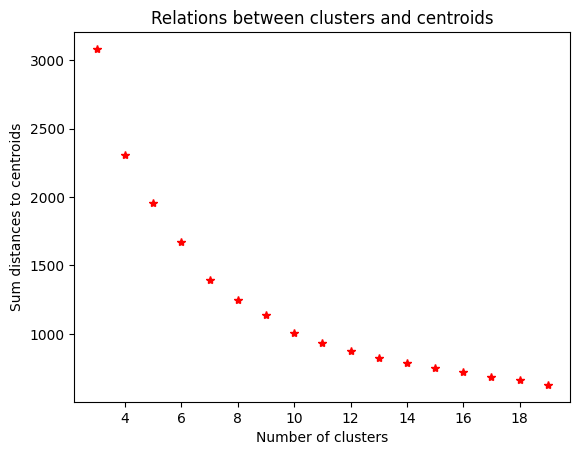

optimal k: 8


In [32]:
optimal_k_acc = best_number_clusters(normalize_data(accelerometer_data), threshold=0.90)
print('optimal k:', optimal_k_acc)

In [33]:
print('optimal k:', optimal_k_acc)

optimal k: 8


In [34]:
%%time
kmeans_acc = KMeans(optimal_k_acc, max_iterations=150)
labels_acc = kmeans_acc.predict(accelerometer_data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

In [35]:
labels_acc.to_csv('labels_acc.csv', index=False)

In [36]:
kmeans_acc.get_distances().max()

6.067217190038384

In [37]:
labels_acc = kmeans_acc.get_labels_with_outliers(2.5)

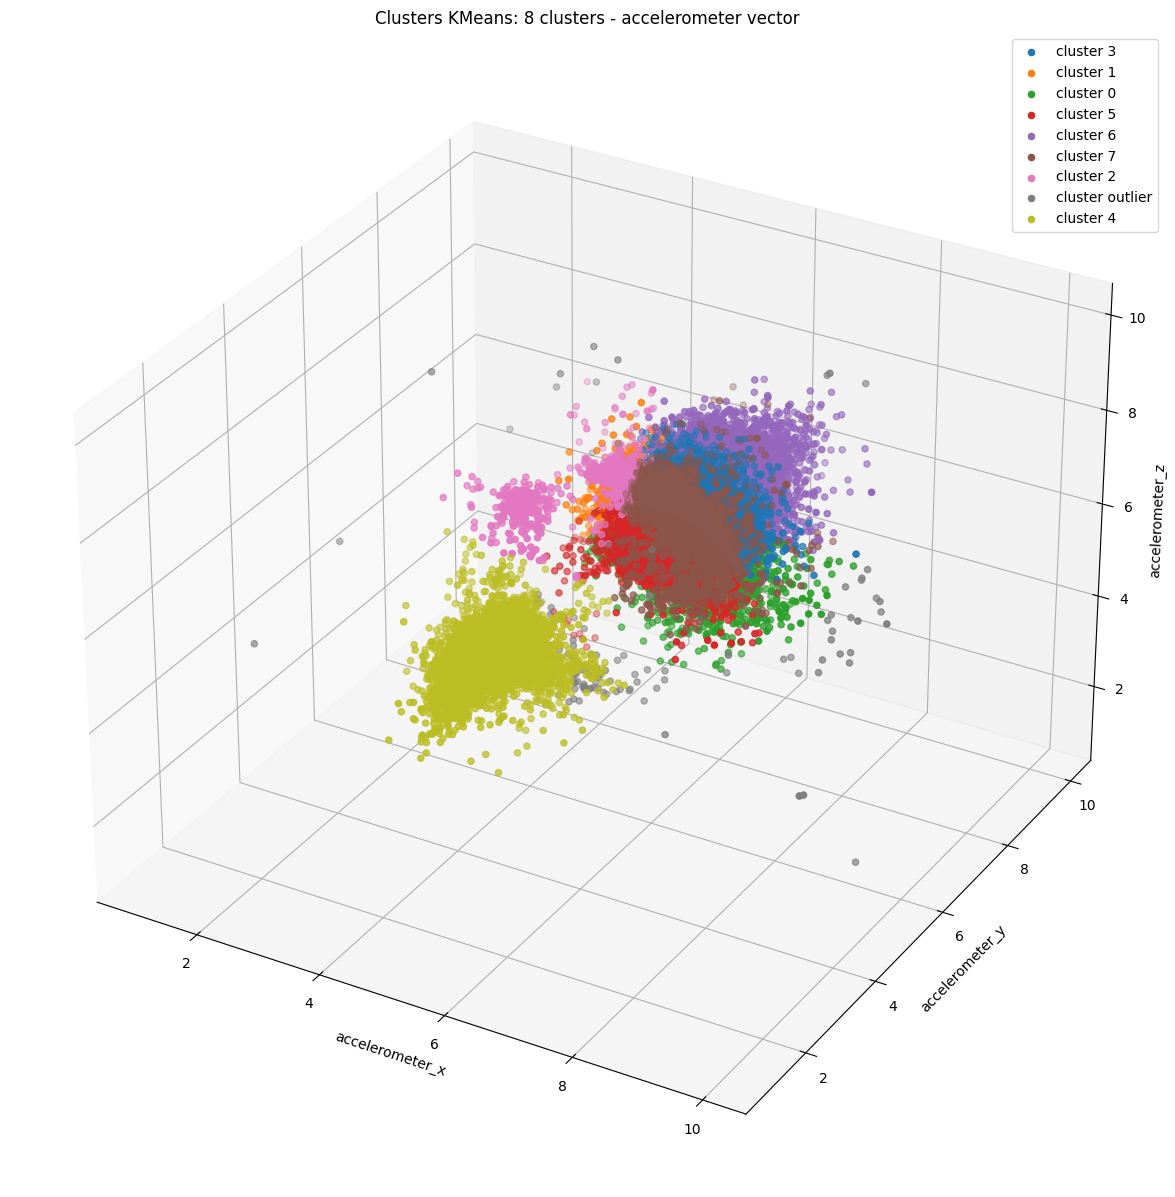

In [38]:
plot_kmeans_clusters(kmeans_acc.data, labels_acc, optimal_k_acc, 'accelerometer')

### Gyroscope

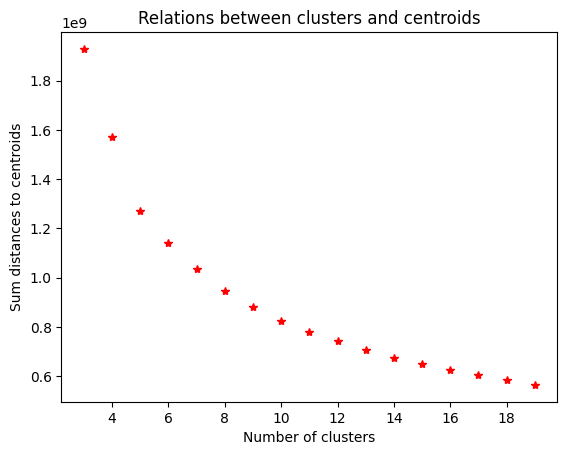

optimal k: 6


In [39]:
optimal_k_gyro = best_number_clusters(gyroscope_data, threshold=0.90)
print('optimal k:', optimal_k_gyro)


In [40]:
%%time
kmeans_gyro = KMeans(optimal_k_gyro)
labels_gyro = kmeans_gyro.predict(gyroscope_data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

In [41]:
labels_gyro = kmeans_gyro.get_labels_with_outliers(2.5)

In [42]:
labels_gyro.to_csv('labels_gyro.csv', index=False)

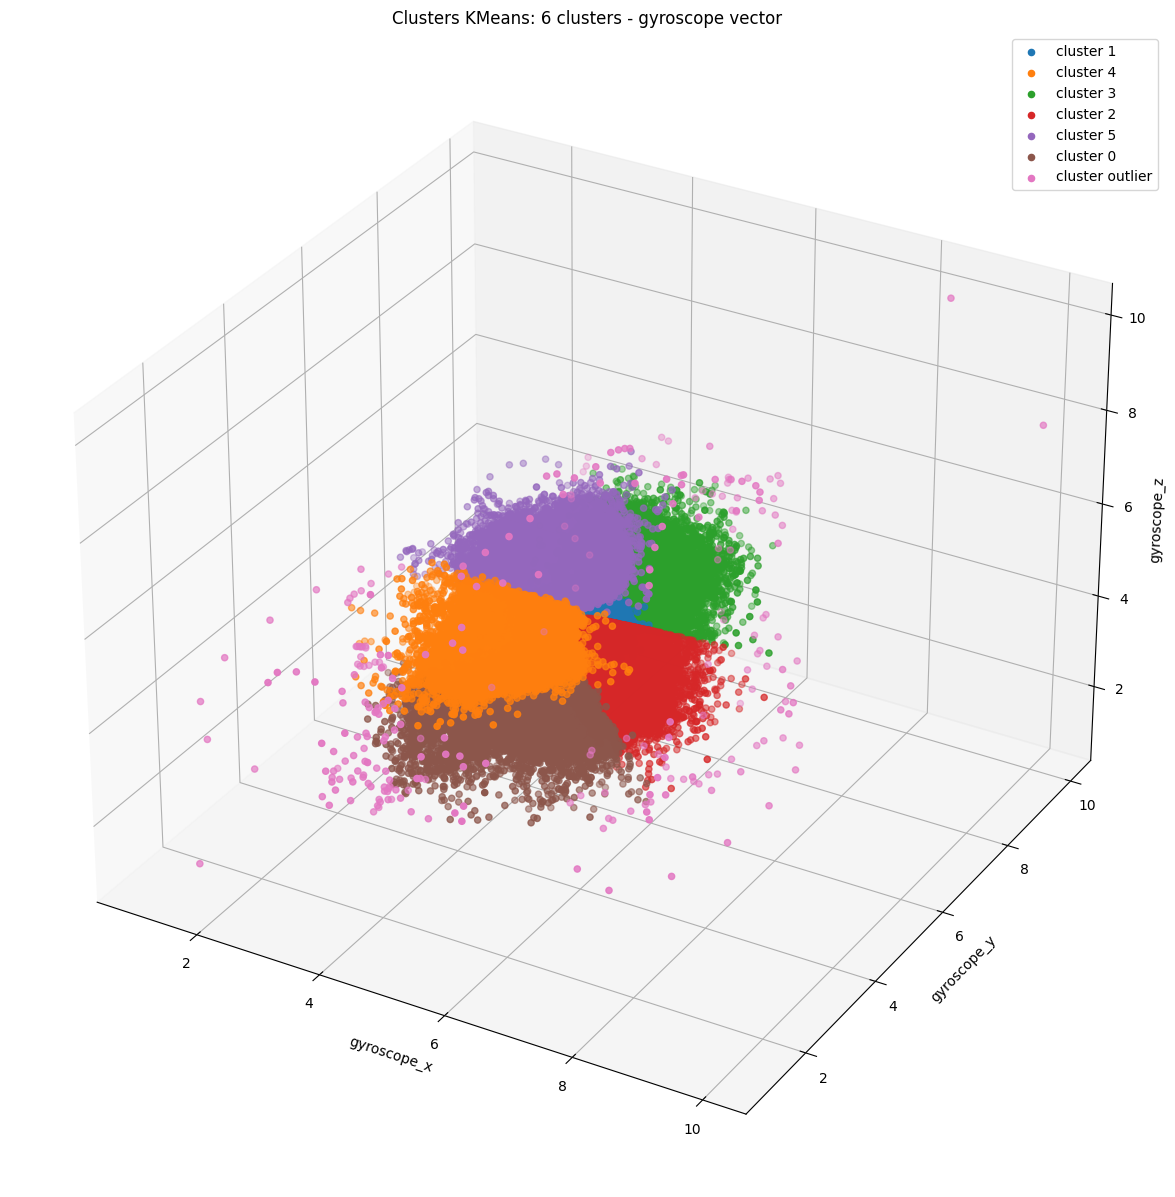

In [43]:
plot_kmeans_clusters(kmeans_gyro.data, labels_gyro, optimal_k_gyro, 'gyroscope')

### Magnetometer

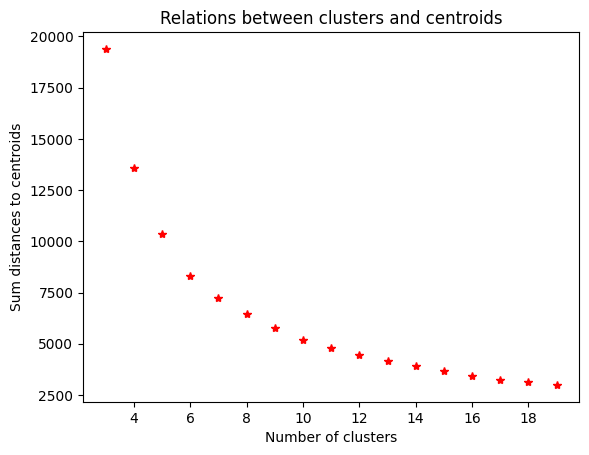

optimal k: 6


In [51]:
optimal_k_mag = best_number_clusters(normalize_data(magnetometer_data), threshold=0.85)
print('optimal k:', optimal_k_mag)

In [45]:
%%time
kmeans_mag = KMeans(optimal_k_mag)
labels_mag = kmeans_mag.predict(magnetometer_data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

In [47]:
labels_mag = kmeans_mag.get_labels_with_outliers(2.5)

In [48]:
labels_mag.to_csv('labels_mag.csv', index=False)

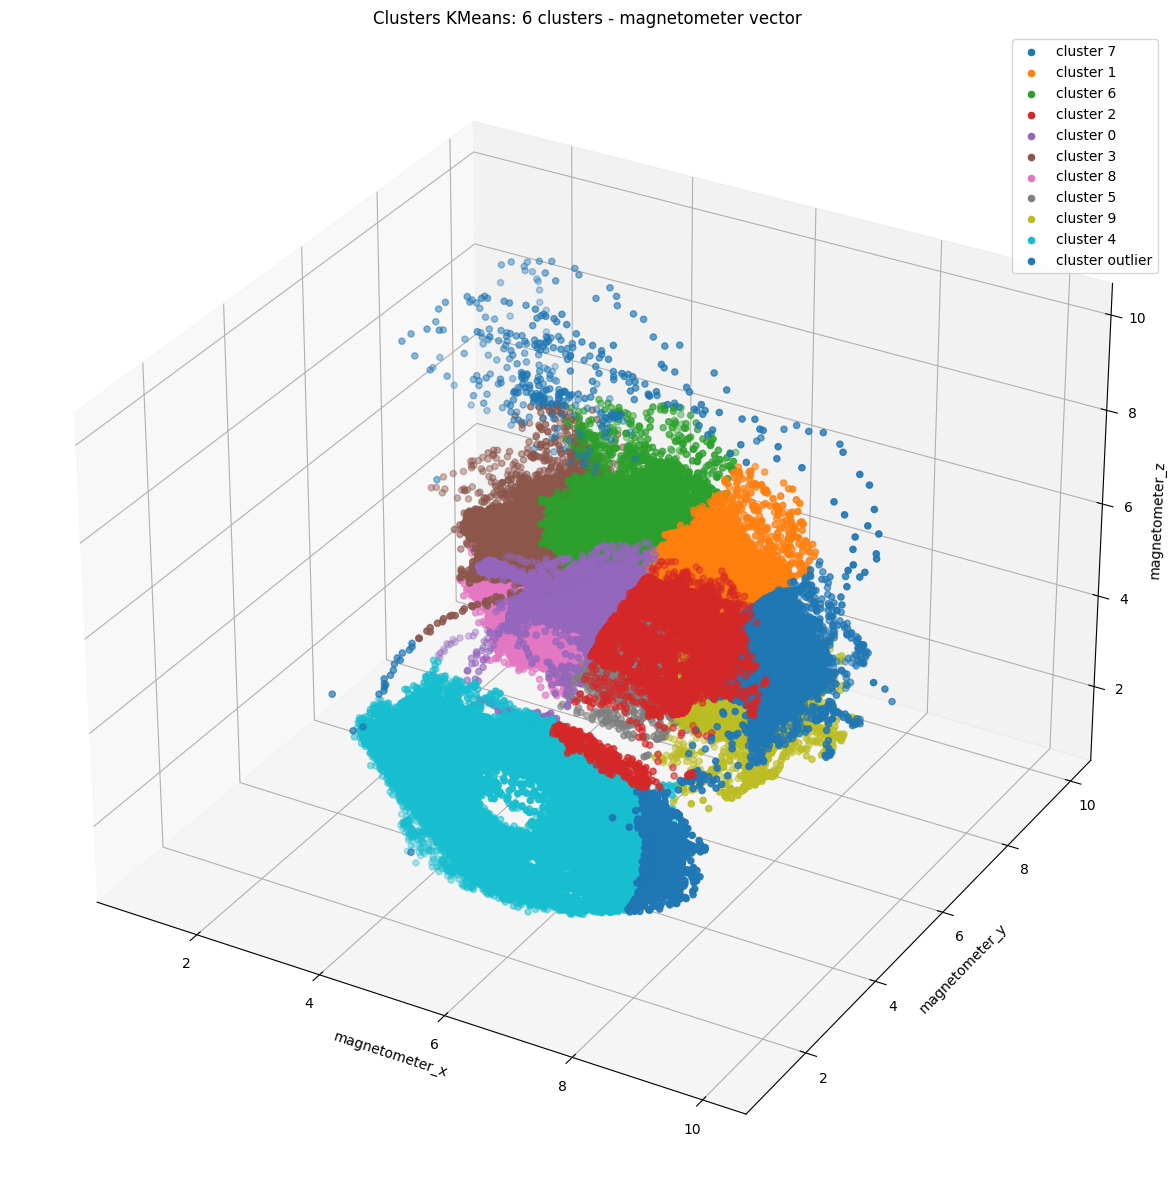

CPU times: total: 16.3 s
Wall time: 16.6 s


In [52]:
%%time
plot_kmeans_clusters(kmeans_mag.data, labels_mag, optimal_k_mag, 'magnetometer')

## Exercise 3.8 - Add outliers

In [20]:
def calculate_density(outliers):
    return outliers.sum() / len(outliers)

In [23]:
def inject_outliers(quantity, data, outliers_indexes, k, mean, std, z=1):
    data = data.copy()
    non_outliers = data[outliers_indexes == False]
    indexes = non_outliers.sample(quantity, random_state=42).index
    data[indexes] = data[indexes].apply(lambda x :  (mean + k * random.choice([1, -1]) * (std + np.random.uniform(0, z))))
    return data

In [26]:
def add_outliers(percentage, k, data):
    indexes = calculate_outliers_indexes(data, k)
    density = calculate_density(indexes)
    mean = data.mean()
    std = data.std()
    if density < percentage:
        quantity = int((percentage - density) * len(data))
        data_with_outliers = inject_outliers(quantity, data, indexes, k, mean, std)
        return data_with_outliers

In [28]:
series_with_outliers = add_outliers(0.1, 3, data['accelerometer_module'])

## Exercise 4.1 - Statistical significance - control the risk

In [15]:
from scipy.stats import kstest
from scipy.stats import norm

Nos resultados apresentados a seguir, foi utilizado um *threshold* the 5% no teste de Kolgomorov-Smirov para que o p-value de forma a aceitar a distribuição das variáveis como normal.

In [29]:
def ks_test(data, variable, threshold=0.05):
    # check if the activities have a normal (gaussian distribution)
    # https://www.statology.org/plot-normal-distribution-python/
    plt.figure()
    plt.title(f'{variable} distribution')
    for activity in data['activity'].unique():
        #divide data by activitis to check the normallity
        activity_data = data[data['activity'] == activity][variable]
        statistics, p_value = kstest(activity_data, norm.cdf)
        if p_value < threshold:
            print(f'Variable {variable} - activitiy {activities_labels[activity]}: Reject normal distributions | p-value={p_value}')
        else:
            print(f'Variable {variable} - activitiy {activities_labels[activity]}: Normal distribution | p-value={p_value}')
        activity_data.hist(alpha=0.4, label=activities_labels[activity])
        
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()
                             

In [17]:
accelerometer_mod_data = right_wrist_data[['accelerometer_module', 'activity']]
gyroscope_mod_data = right_wrist_data[['gyroscope_module', 'activity']]
magnetometer_mod_data = right_wrist_data[['magnetometer_module', 'activity']]

Variable accelerometer_module - activitiy STAND: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy STAND_TO_SIT: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy SIT: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy SIT_TO_STAND: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy STAND_TO_SIT&TALK: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy SIT&TALK: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy SIT&TALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy STAND_TO_WALK: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy WALK: Reject normal distributions | p-value=0.0
Variable accelerometer_module - activitiy WALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable accelerometer_module - acti

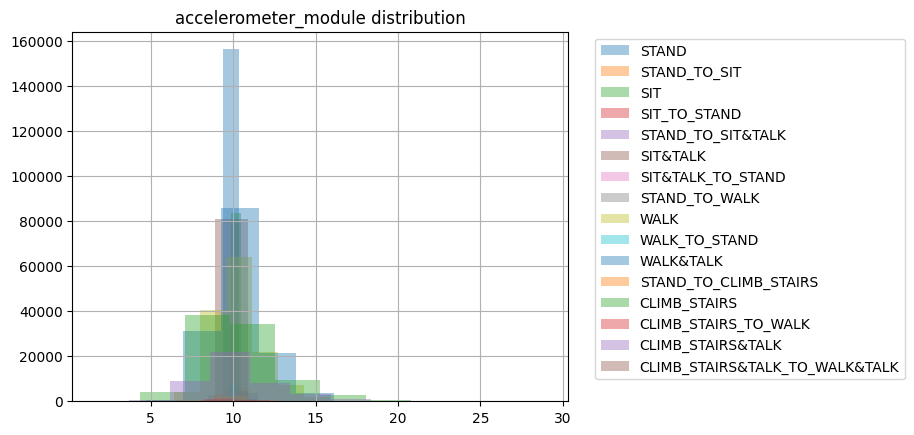

In [18]:
ks_test(accelerometer_mod_data, 'accelerometer_module')

Como se pode observar, apesar de histogramas do módulo do vetor de aceleração parecerem seguir uma distribuição normal, todos têm p-value inferior ao minimo necessário para aceitar a hipótese nula, logo não segue uma distribuição normal.

Variable gyroscope_module - activitiy STAND: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy STAND_TO_SIT: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy SIT: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy SIT_TO_STAND: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy STAND_TO_SIT&TALK: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy SIT&TALK: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy SIT&TALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy STAND_TO_WALK: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy WALK: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy WALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable gyroscope_module - activitiy WALK&TALK: Reject normal distributions

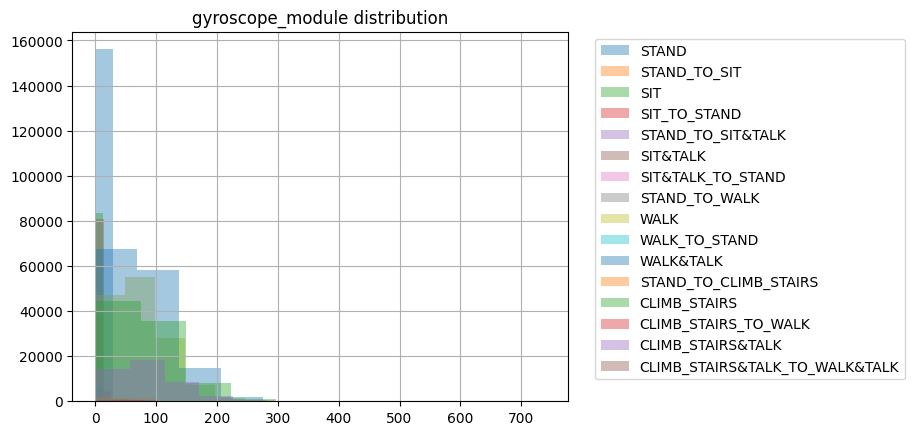

In [19]:
ks_test(gyroscope_mod_data, 'gyroscope_module')

Como se pode observar pela distribuição e pelo p-value, o módulo do vetor giroscópio não segue uma distribuição gaussiana.

Variable magnetometer_module - activitiy STAND: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy STAND_TO_SIT: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy SIT: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy SIT_TO_STAND: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy STAND_TO_SIT&TALK: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy SIT&TALK: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy SIT&TALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy STAND_TO_WALK: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy WALK: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy WALK_TO_STAND: Reject normal distributions | p-value=0.0
Variable magnetometer_module - activitiy WALK&

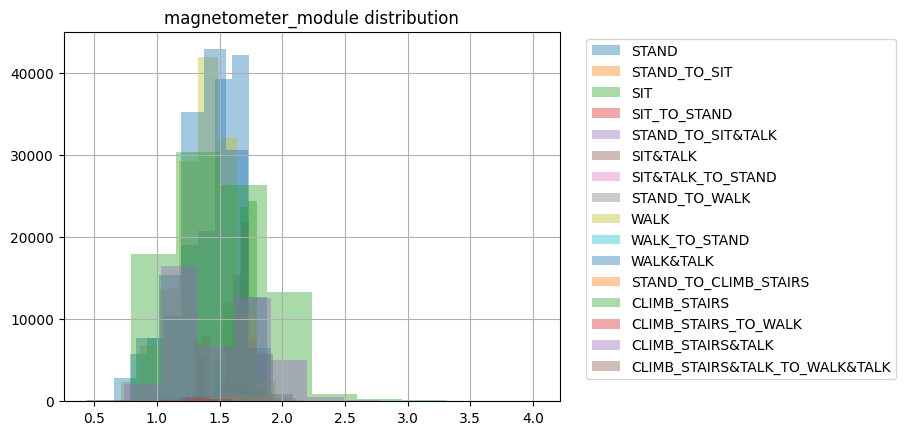

In [20]:
ks_test(magnetometer_mod_data, 'magnetometer_module')

Pela observação so gráfico e pelo valor obtido no p-value concluí-mos que o módulo do vetor do magnómetro não segue uma distribuição normal.

Em todas as variáveis, notou-se o que valor resultante do p-value usando o teste de Kolmogorov-Smirnov é nulo, ou perto disso. Assim, conclí-mos que nenhum dos vetores segue uma distribuição normal.

Em suma:

    - os módulos dos vetores não seguem uma distribuição normal/gaussiana pelo que temos de escolher um teste não-paramétrico (apesar de termos um dimensão bastante elevada de valores de input)
    - temos 3 variáveis (x, y, e, z de cada vetor) numéricas como valor de input que estão emparelhadas entre si
 
Assim, segundo o *Choosing Statistical Tests* (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2881615/), escolhemos o teste de Friedman para calcular a significância estatística das variáveis.

In [23]:
from scipy.stats import friedmanchisquare

In [27]:
def friedman_test(data, variables, threshold=0.05):
    # https://www.statology.org/friedman-test-python/
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html

    # null-hypothesis: all variables have the same probability (mean)
    # at least one variable has a different probability

    x = data[variables[0]]
    y = data[variables[1]]
    z = data[variables[2]]

    for activity in data['activity'].unique():
        act_x = x[data['activity'] == activity]
        act_y = y[data['activity'] == activity]
        act_z = z[data['activity'] == activity]

        statistic, pvalue = friedmanchisquare(act_x, act_y, act_z)

        if pvalue < threshold:
            print(f"Activity {activities_labels[activity]} - Samples don't have the same distribution | p-value={pvalue}")
        else:
            print(f"Activity {activities_labels[activity]} - Samples have the same distribution | p-value={pvalue}")


In [31]:
var = 'accelerometer'
friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

Activity STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_WALK - Samples don't have the same distribution | p-value=0.0
Activity WALK - Samples don't have the same distribution | p-value=0.0
Activity WALK_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity WALK&TALK - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_CLIMB_STAIRS - Samples don't have the same distribution | p-value=0.0
Activity CLIMB_STAIRS - Samples don't have the same distributi

In [29]:
var = 'gyroscope'
friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

Activity STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT - Samples don't have the same distribution | p-value=1.533122713563826e-104
Activity SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT_TO_STAND - Samples don't have the same distribution | p-value=1.485360778908544e-21
Activity STAND_TO_SIT&TALK - Samples don't have the same distribution | p-value=2.4822179278238128e-50
Activity SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK_TO_STAND - Samples don't have the same distribution | p-value=1.4361869146926108e-13
Activity STAND_TO_WALK - Samples don't have the same distribution | p-value=3.43845656034788e-17
Activity WALK - Samples don't have the same distribution | p-value=9.036910839276396e-214
Activity WALK_TO_STAND - Samples don't have the same distribution | p-value=2.3614413888901384e-83
Activity WALK&TALK - Samples don't have the same distribution | p-value=2.561168163872224e-10
Ac

In [30]:
var = 'magnetometer'
friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

Activity STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT - Samples don't have the same distribution | p-value=0.0
Activity SIT_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK - Samples don't have the same distribution | p-value=0.0
Activity SIT&TALK_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_WALK - Samples don't have the same distribution | p-value=0.0
Activity WALK - Samples don't have the same distribution | p-value=0.0
Activity WALK_TO_STAND - Samples don't have the same distribution | p-value=0.0
Activity WALK&TALK - Samples don't have the same distribution | p-value=0.0
Activity STAND_TO_CLIMB_STAIRS - Samples don't have the same distribution | p-value=0.0
Activity CLIMB_STAIRS - Samples don't have the same distributi

Como se pode observar, p-value, resultante do teste de Friedman para todas os vetores e actividades, é sempre nulo, pelo que rejeitamos a hipótese de que os dados seguem a mesma distribuição 

## Exercise 4.2 - feature extraction

In [20]:
df = pd.DataFrame()

In [21]:
df['a'] = [1, 2, 3, 4]

In [24]:
df['b'] = [6, 7, 8, 9]
df

,a,b
0,1,6
1,2,7
2,3,8
3,4,9


In [27]:
df.mean(axis=1)

0    3.5
1    4.5
2    5.5
3    6.5
dtype: float64

In [28]:
from scipy import stats

In [ ]:
def extract_statistical_features(data):
    df = pd.DataFrame()
    df['mean'] = data.mean()
    # mean
    # median
    df['median'] = data.median()
    # Std
    df['std'] = data.std()
    # variance
    df['variance'] = data.variance()
    # Root mean square
    df['rms'] = np.sqrt(data.mean())
    # average derivatives
    # Skewness
    df['skewness'] = data.skewness()
    # kurtosis
    df['kurtosis'] = data.kurtosis()
    # Interquartile range
    df['interquantile'] = stats.iqr(data)
    # zero crossing rate
    # mean crossing rate
    # pairwise correlation
    # spectral entropy

    pass

In [ ]:
def extract_phisical_features(data):
    # movement intensity - independent od the orientation (MI) not used
    # AI - MI mean
    # VI - MI variance
    # SMA - normalized signal magnitude area
    # EVA - eigenvalues of dominant directions
    # CAGH - correlation between acceleration along gravity and heading directions
    # AVH - averaged velocity along heading direction
    # AVG - averaged velocity along gravity direction
    # ARATG - average rotation angles related to gravity direction
    # DF - dominant frequency
    # energy 
    # AAE averaged acceleration energy
    # ARE - averaged rotation energy
    pass